<a href="https://colab.research.google.com/github/Deepak-desk/Deepak-desk/blob/main/Vehicle%20Number%20plate%20detection%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ EasyOCR initialized


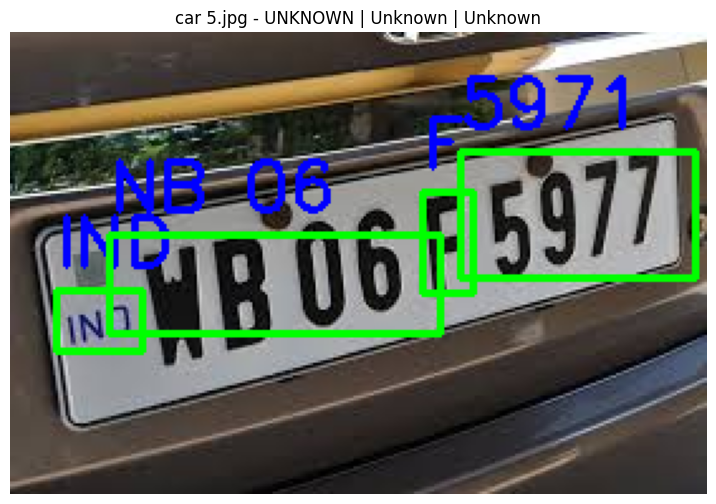


===== car 5.jpg =====
--- Plate 1 ---
OCR Text         : F
Confidence       : 98.59%
Plate Color      : UNKNOWN
Vehicle Type     : Unknown
Registered State : Unknown
--- Plate 2 ---
OCR Text         : IND
Confidence       : 87.48%
Plate Color      : UNKNOWN
Vehicle Type     : Unknown
Registered State : Unknown
--- Plate 3 ---
OCR Text         : 5971
Confidence       : 60.37%
Plate Color      : UNKNOWN
Vehicle Type     : Unknown
Registered State : Unknown
--- Plate 4 ---
OCR Text         : NB 06 
Confidence       : 27.45%
Plate Color      : UNKNOWN
Vehicle Type     : Unknown
Registered State : Unknown
------------------------------------------------------------


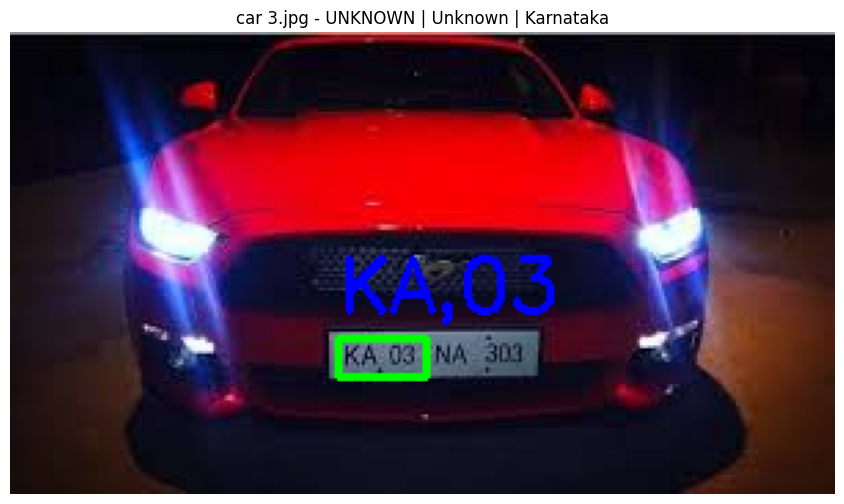


===== car 3.jpg =====
--- Plate 1 ---
OCR Text         : KA,03
Confidence       : 70.59%
Plate Color      : UNKNOWN
Vehicle Type     : Unknown
Registered State : Karnataka
------------------------------------------------------------


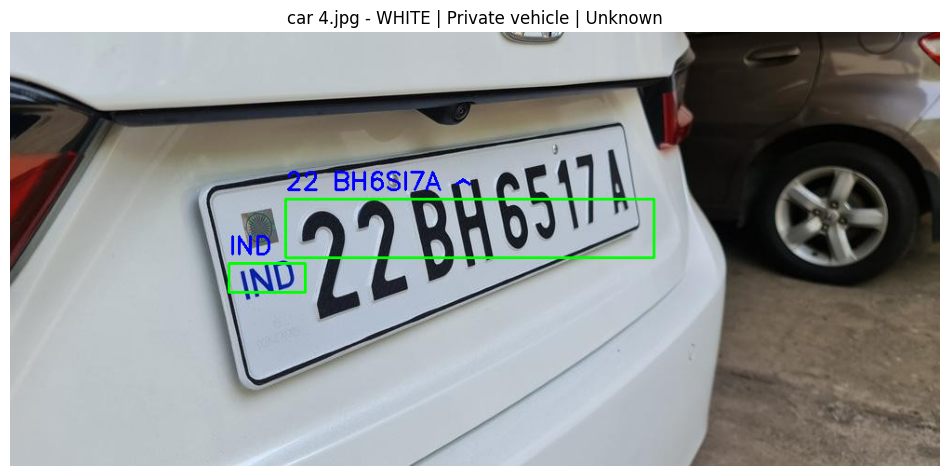


===== car 4.jpg =====
--- Plate 1 ---
OCR Text         : 22 BH6SI7A ^
Confidence       : 6.8%
Plate Color      : WHITE
Vehicle Type     : Private vehicle
Registered State : Unknown
--- Plate 2 ---
OCR Text         : IND
Confidence       : 99.95%
Plate Color      : UNKNOWN
Vehicle Type     : Unknown
Registered State : Unknown
------------------------------------------------------------


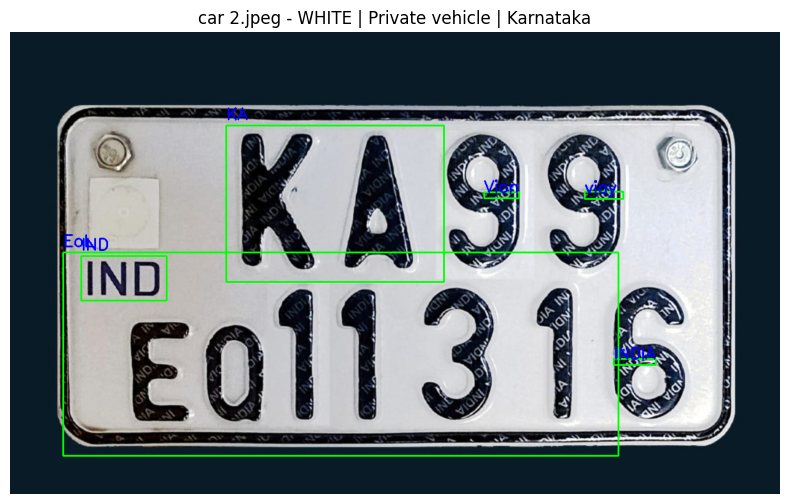


===== car 2.jpeg =====
--- Plate 1 ---
OCR Text         : KA
Confidence       : 72.16%
Plate Color      : WHITE
Vehicle Type     : Private vehicle
Registered State : Karnataka
--- Plate 2 ---
OCR Text         : IND
Confidence       : 99.99%
Plate Color      : UNKNOWN
Vehicle Type     : Unknown
Registered State : Unknown
--- Plate 3 ---
OCR Text         : EoL
Confidence       : 50.02%
Plate Color      : UNKNOWN
Vehicle Type     : Unknown
Registered State : Unknown
--- Plate 4 ---
OCR Text         : viay
Confidence       : 29.4%
Plate Color      : UNKNOWN
Vehicle Type     : Unknown
Registered State : Unknown
--- Plate 5 ---
OCR Text         : Vion
Confidence       : 39.07%
Plate Color      : UNKNOWN
Vehicle Type     : Unknown
Registered State : Unknown
--- Plate 6 ---
OCR Text         : INDIA
Confidence       : 99.81%
Plate Color      : UNKNOWN
Vehicle Type     : Unknown
Registered State : Unknown
------------------------------------------------------------


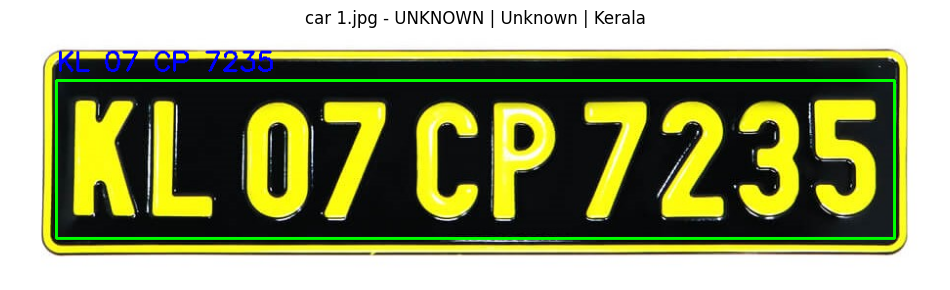


===== car 1.jpg =====
--- Plate 1 ---
OCR Text         : KL 07 CP 7235
Confidence       : 92.03%
Plate Color      : UNKNOWN
Vehicle Type     : Unknown
Registered State : Kerala
------------------------------------------------------------


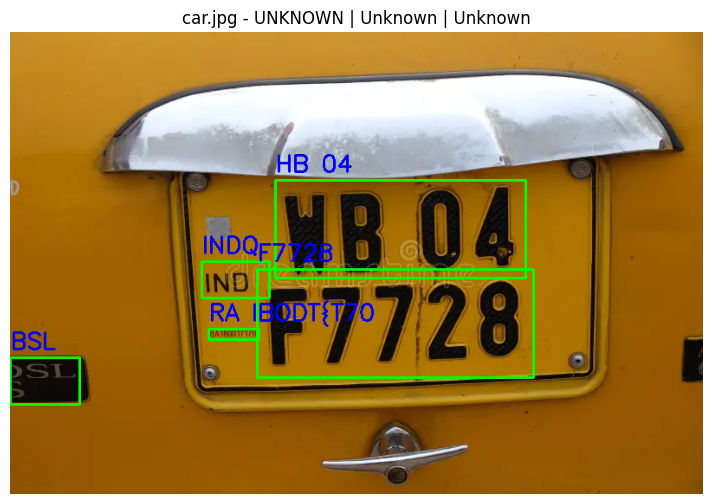


===== car.jpg =====
--- Plate 1 ---
OCR Text         : HB 04
Confidence       : 80.03%
Plate Color      : UNKNOWN
Vehicle Type     : Unknown
Registered State : Unknown
--- Plate 2 ---
OCR Text         : INDQ
Confidence       : 33.59%
Plate Color      : UNKNOWN
Vehicle Type     : Unknown
Registered State : Unknown
--- Plate 3 ---
OCR Text         : RA IBODT{T70
Confidence       : 25.22%
Plate Color      : UNKNOWN
Vehicle Type     : Unknown
Registered State : Odisha
--- Plate 4 ---
OCR Text         : F7728
Confidence       : 99.87%
Plate Color      : UNKNOWN
Vehicle Type     : Unknown
Registered State : Unknown
--- Plate 5 ---
OCR Text         : BSL
Confidence       : 23.34%
Plate Color      : UNKNOWN
Vehicle Type     : Unknown
Registered State : Unknown
------------------------------------------------------------


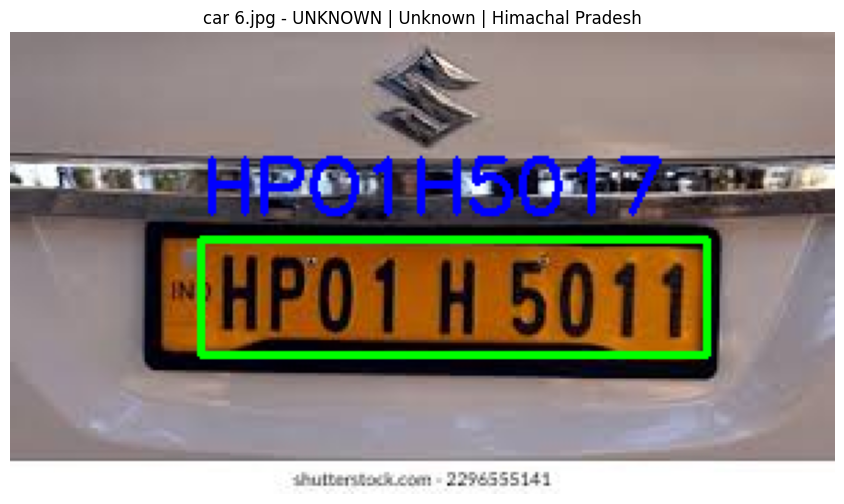


===== car 6.jpg =====
--- Plate 1 ---
OCR Text         : HPO1H5017
Confidence       : 34.04%
Plate Color      : UNKNOWN
Vehicle Type     : Unknown
Registered State : Himachal Pradesh
------------------------------------------------------------


In [17]:
import cv2
import matplotlib.pyplot as plt
import easyocr
import numpy as np
import os

IMAGE_FOLDER = 'images'

STATE_CODES = {
    "AN": "Andaman and Nicobar", "AP": "Andhra Pradesh", "AR": "Arunachal Pradesh",
    "AS": "Assam", "BR": "Bihar", "CH": "Chandigarh", "CG": "Chhattisgarh",
    "DD": "Daman and Diu", "DL": "Delhi", "DN": "Dadra and Nagar Haveli",
    "GA": "Goa", "GJ": "Gujarat", "HR": "Haryana", "HP": "Himachal Pradesh",
    "JH": "Jharkhand", "JK": "Jammu and Kashmir", "KA": "Karnataka",
    "KL": "Kerala", "LA": "Ladakh", "LD": "Lakshadweep", "MH": "Maharashtra",
    "ML": "Meghalaya", "MN": "Manipur", "MP": "Madhya Pradesh", "MZ": "Mizoram",
    "NL": "Nagaland", "OD": "Odisha", "PB": "Punjab", "PY": "Puducherry",
    "RJ": "Rajasthan", "SK": "Sikkim", "TN": "Tamil Nadu", "TR": "Tripura",
    "TS": "Telangana", "UK": "Uttarakhand", "UP": "Uttar Pradesh",
    "WB": "West Bengal"
}

PLATE_COLOR_MEANING = {
    'white': 'Private vehicle',
    'yellow': 'Commercial vehicle',
    'green': 'Electric vehicle',
    'black': 'Rental/self-drive vehicle',
    'red': 'Temporary registration',
    'blue': 'Diplomatic vehicle',
    'red_emblem': 'President/Governor vehicle'
}

class LicensePlateProcessor:
    def __init__(self, languages=['en']):
        self.reader = easyocr.Reader(languages)
        print("✅ EasyOCR initialized")

    def get_dominant_color(self, plate_img: np.ndarray) -> str:
        if plate_img is None or plate_img.size == 0:
            return 'unknown'

        hsv = cv2.cvtColor(plate_img, cv2.COLOR_BGR2HSV)
        h, s, v = cv2.split(hsv)

        avg_h = np.median(h)
        avg_s = np.median(s)
        avg_v = np.median(v)

        # Robust color detection using HSV
        if avg_s < 50 and avg_v > 200:
            return 'white'
        elif 20 < avg_h < 40 and avg_s > 100:
            return 'yellow'
        elif 35 < avg_h < 85 and avg_s > 100:
            return 'green'
        elif (avg_h < 10 or avg_h > 170) and avg_s > 100:
            return 'red'
        elif avg_s < 50 and avg_v < 80:
            return 'black'
        elif 90 < avg_h < 130 and avg_s > 80:
            return 'blue'
        else:
            return 'unknown'

    def process_image(self, image_path: str) -> dict:
        image = cv2.imread(image_path)
        if image is None:
            print(f"❌ Cannot load image: {image_path}")
            return {}

        results = self.reader.readtext(image)
        annotated_image = image.copy()

        plate_info = {
            'filename': os.path.basename(image_path),
            'detected_plates': []
        }

        for (bbox, text, prob) in results:
            if not text.strip():
                continue

            (top_left, _, bottom_right, _) = bbox
            x1, y1 = map(int, top_left)
            x2, y2 = map(int, bottom_right)

            x1 = max(0, x1)
            y1 = max(0, y1)
            x2 = min(image.shape[1], x2)
            y2 = min(image.shape[0], y2)

            try:
                crop = image[y1:y2, x1:x2]
            except:
                crop = None

            plate_color = self.get_dominant_color(crop)
            vehicle_type = PLATE_COLOR_MEANING.get(plate_color, "Unknown")

            possible_state = text[:2].upper()
            detected_state = STATE_CODES.get(possible_state, "Unknown")
            if detected_state == "Unknown":
                for i in range(len(text) - 1):
                    code = text[i:i+2].upper()
                    if code in STATE_CODES:
                        detected_state = STATE_CODES[code]
                        break

            cv2.rectangle(annotated_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(annotated_image, text, (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

            plate_info['detected_plates'].append({
                'text': text,
                'probability': prob,
                'bbox': bbox,
                'color': plate_color,
                'vehicle_type': vehicle_type,
                'state': detected_state
            })

        plate_info['annotated_image'] = annotated_image
        return plate_info

    def display_results(self, plate_info: dict):
        if not plate_info:
            print("❌ No data to show.")
            return

        filename = plate_info.get('filename', 'Unknown')
        annotated_image = plate_info.get('annotated_image')

        if annotated_image is None:
            print(f"No annotated image for {filename}.")
            return

        plt.figure(figsize=(12, 6))
        plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))

        if plate_info['detected_plates']:
            first = plate_info['detected_plates'][0]
            title = f"{filename} - {first['color'].upper()} | {first['vehicle_type']} | {first['state']}"
        else:
            title = f"{filename} - No Plates Detected"

        plt.title(title)
        plt.axis('off')
        plt.show()

        print(f"\n===== {filename} =====")
        if plate_info['detected_plates']:
            for i, plate in enumerate(plate_info['detected_plates']):
                print(f"--- Plate {i+1} ---")
                print(f"OCR Text         : {plate['text']}")
                print(f"Confidence       : {round(plate['probability'] * 100, 2)}%")
                print(f"Plate Color      : {plate['color'].upper()}")
                print(f"Vehicle Type     : {plate['vehicle_type']}")
                print(f"Registered State : {plate['state']}")
        else:
            print("No license plate text detected.")

# Main Execution
if __name__ == "__main__":
    if not os.path.exists(IMAGE_FOLDER):
        os.makedirs(IMAGE_FOLDER)
        print(f"🗂️ Folder created: {IMAGE_FOLDER} — add images to this folder.")

    processor = LicensePlateProcessor()

    for filename in os.listdir(IMAGE_FOLDER):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            full_path = os.path.join(IMAGE_FOLDER, filename)
            result = processor.process_image(full_path)
            processor.display_results(result)
            print("-" * 60)


In [1]:
pip install opencv-python easyocr matplotlib numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 102.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 